# Investigacion Corta 4     

# Autoencoders

## 29JUL2021

## Curso: TEC-BSC Reconocimiento de Patrones

### Profesor: Msc. Felipe Meza

### Alumno: Oscar Castro

## ¿Qué es un Autoencoder?

#### Un autoencoder (autocodificador) es una gran herramienta para recrear una entrada, la entrada es codificada por la red para centrarse solo en la característica más crítica. Esta es una de las razones por las que el autoencoder es popular para la reducción de dimensionalidad. Además, los autocodificadores se pueden usar para producir modelos de aprendizaje generativo. 

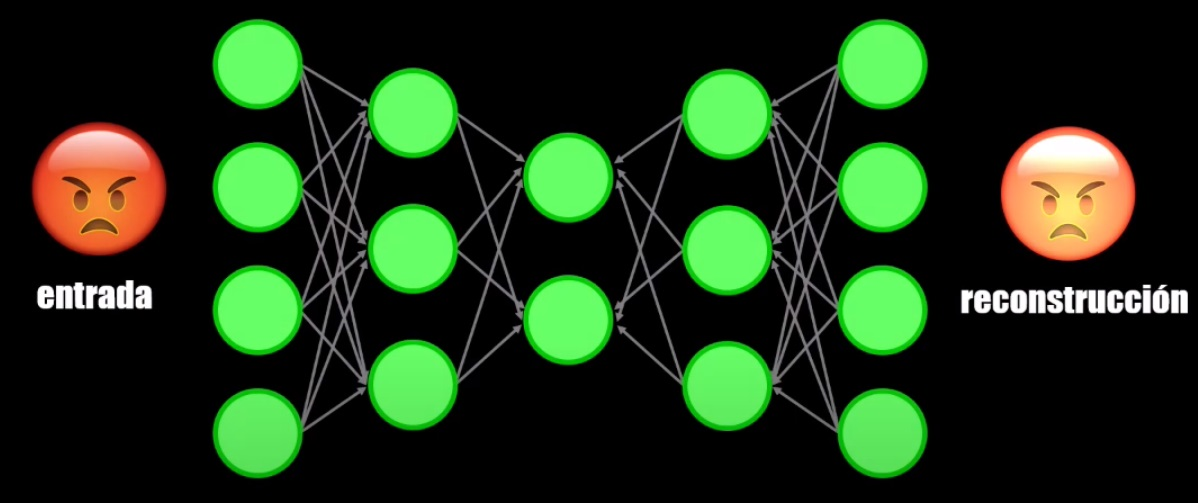

#### En la etapa del bottleneck (latent space) se obtiene una representacion compacta de los datos de entrada, donde el dato obtenido es una version comprimida de la entrada (cantidad menor de datos), que es el resultado del entrenamiento donde la red aprende a extraer la informacion mas relevante de los datos de entrada 

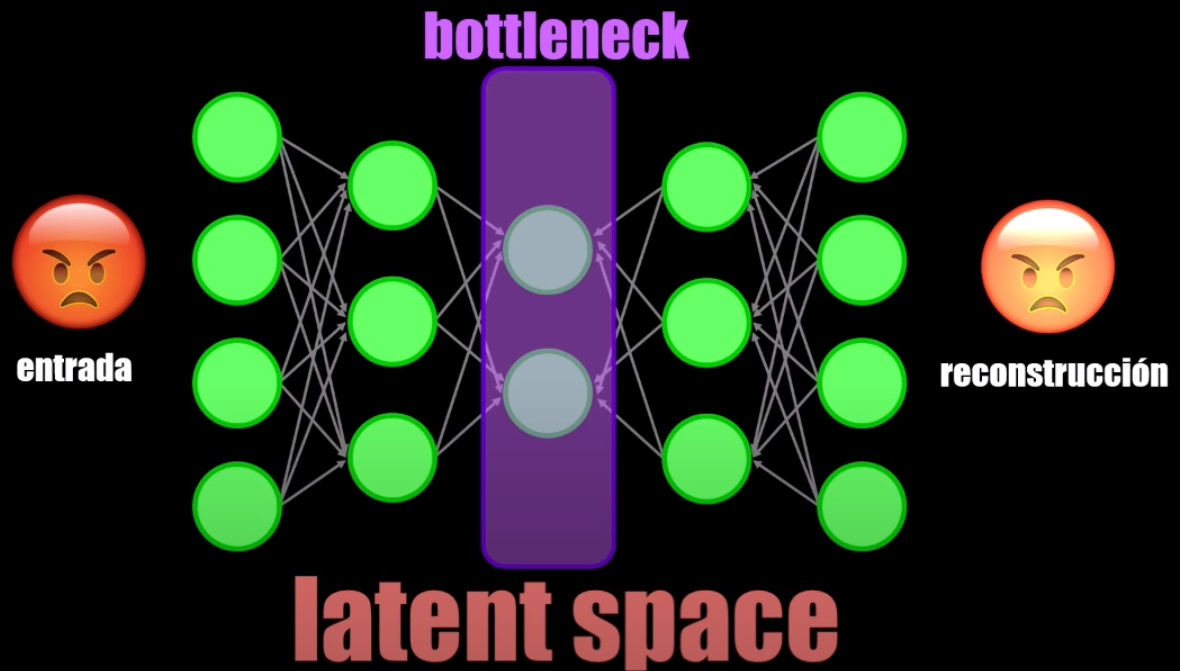

#### El autoencoder se entrena de manera similar a una red neuronal, donde la funcion de error usada para actualizar los coeficientes del autoencoder es el resultado de comparar punto a punto el dato reconstruido con el dato original, el autoencoder es un ejemplo de Aprendizaje No supervisado ya que durante el entrenamiento no se define la categoria a la que pertenece cada entrada ya que se busca que la salida sea precisamente el dato de entrada. Ejemplos de uso:

#### Eliminacion de ruido:

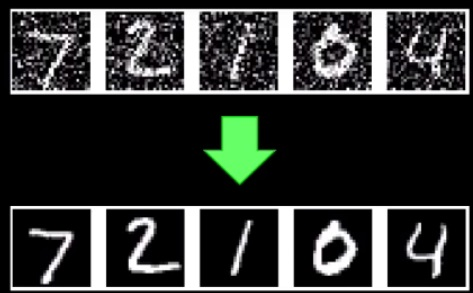

#### Deteccion de anomalias:

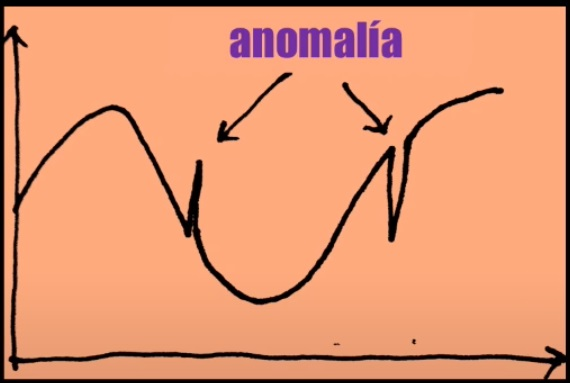

## ¿Cómo funciona Autoencoder?

#### El propósito de un autocodificador es producir una aproximación de la entrada centrándose solo en las características esenciales, provee un conjunto de restricciones que obligan a la red a aprender nuevas formas de representar los datos, diferentes de simplemente copiar la salida.

#### Un autocodificador típico se define con una entrada, una representación interna y una salida (una aproximación de la entrada). El aprendizaje se produce en las capas enlazadas a la representación interna. De hecho, hay dos bloques principales de capas que se parecen a una red neuronal tradicional. La ligera diferencia es que la capa que contiene la salida debe ser igual a la entrada. En la imagen de abajo, la entrada original entra en el primer bloque llamado el codificador. Esta representación interna comprime (reduce) el tamaño de la entrada. En el segundo bloque se produce la reconstrucción de la entrada. Esta es la fase de decodificación.



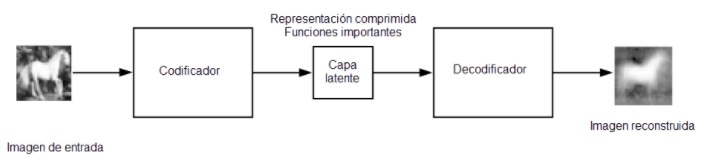

#### El modelo actualizará los pesos minimizando la función de pérdida. El modelo se penaliza si la salida de reconstrucción es diferente de la entrada.

#### Por ejemplo, una imagen con un tamaño de 50×50 (es decir, 250 píxeles) y una red neuronal con una sola capa oculta compuesta de cien neuronas. El aprendizaje se realiza en un mapa de entidades que es dos veces más pequeño que la entrada. Significa que la red necesita encontrar una manera de reconstruir 250 píxeles con solo un vector de neuronas igual a 100.

### A continuacion un ejemplo del uso de un autoencoder el cual tiene la finalidad de detectar transacciones fraudulentas en tarjetas de credito y debito. 

##### Se obtiene un set de datos que contiene registros de transacciones realizadas de las cuales mas del 99.5% son transacciones normales

##### El set de datos cuenta con alrededor de 30 caracteristicas de las cuales no hay una manera simple de identificar los fraudes, de esta manera es que se determina que el uso del autoencoder podria favorecer a delimitar las caracteristicas mas relevantes para tratar de detectar las anomalias con respecto a los datos de entrada. 

##### Caracteristicas del autoencoder:

##### 1. Numero de caracteristicas de cada dato de entrenamiento: 29 entradas, 
##### 2. Encoder, representacion compacta con:  
#####       2.a una primera etapa de 20 neuronas con activacion tangente hiperbolica (tanh) 
#####       2.b segunda etapa de 14 neuronas con activacion "relu", esta segunda etapa del encoder es el bottleneck, que es la representacion mas comprimida de los datos de entrada.  
##### 3. Decoder, representacion de los datos reconstruidos con:
#####      3.a una primera etapa de 20 neuronas con activacion tangente hiperbolica (tanh) 
#####      3.b segunda etapa de la capa de salida con 29 neuronas y activacion "relu", lo cual es la representacion reconstruida del dato final  

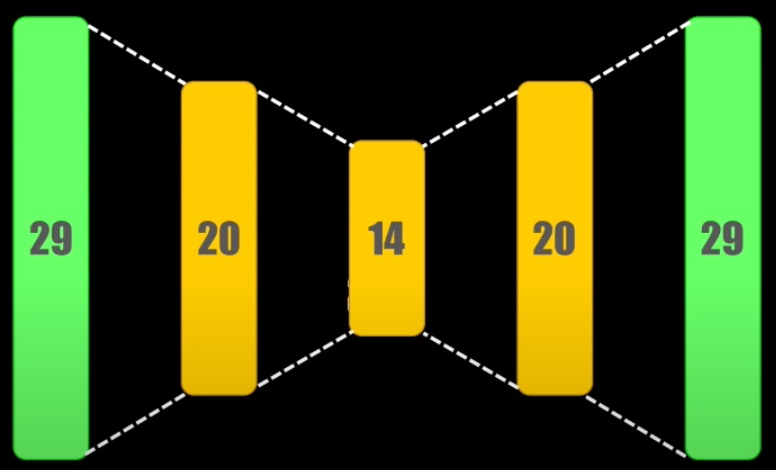

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv("https://raw.githubusercontent.com/ocastroq/TEC_BSC_Reconocimiento_de_Patrones/main/creditcard_csv.csv")
print(datos.head())
nr_clases=datos['Class'].value_counts(sort=True)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

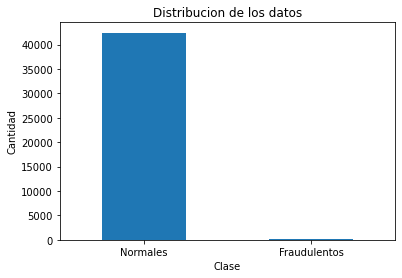

In [2]:
nr_clases.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normales','Fraudulentos'])
plt.title("Distribucion de los datos")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

In [3]:
# se elimina la caracteristica "tiempo" ya que no brinda informacion relevante 
from sklearn.preprocessing import StandardScaler
datos.drop(['Time'], axis=1, inplace=True)

In [4]:
# se normaliza la caracteristica "Amount" para que tenga una media = 0 y desviacion std = 1, 
# de manera que sea comparable al resto de las caracteristicas V1 a V28
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1,1))

In [34]:
# se crea el set de entrenamiento, con el 80% de los datos de entrada
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(datos, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values

Y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_test = X_test.values

In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np

In [9]:
# Para la implementacion del autoencoder, primero se define la capa de entrada con el mismo numero de elementos que 
# cada dato en el set de entrenamiento = 29 datos
np.random.seed(5)
from keras.models import Model, load_model
from keras.layers import Input, Dense

dim_entrada = X_train.shape[1]
capa_entrada = Input(shape=(dim_entrada,))

In [10]:
# Se crea el encoder con 2 capas, pasando de la version original a la version comprimida 
encoder = Dense(20, activation='tanh')(capa_entrada)
encoder = Dense(14, activation='relu')(encoder)

In [11]:
# se crea el decoder con 2 capas, pasando de la version comprimida a la version reconstruida
decoder = Dense(20, activation='tanh')(encoder)
decoder = Dense(29, activation='relu')(encoder)

In [12]:
# se crea el encoder , combinando el encoder y el decoder
autoencoder = Model (inputs=capa_entrada, outputs=decoder)

In [19]:
# para el entrenamiento se utilizara el metodo de gradiente descendente con una capa de 
# aprendizaje de 0.01, se realiza una comparacion punto a punto el dato del modelo reconstuido 
# con el dato del modelo original
from keras.optimizers import SGD
sgd = SGD(lr=0.01)
autoencoder.compile(optimizer='sgd', loss='mse')

In [ ]:
# el modelo se entrena utilizando un total de 100 iteraciones y tamannos de lote de 32
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, verbose=1)

In [21]:
# se utiliza la funcion predict para obtener la reproduccion de cada dato de entrada
X_pred = autoencoder.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)
print(X_pred.shape)

(8507, 29)


##### Se debe definir el umbral y para esto se definen los concepto precision y recall:


##### Precision

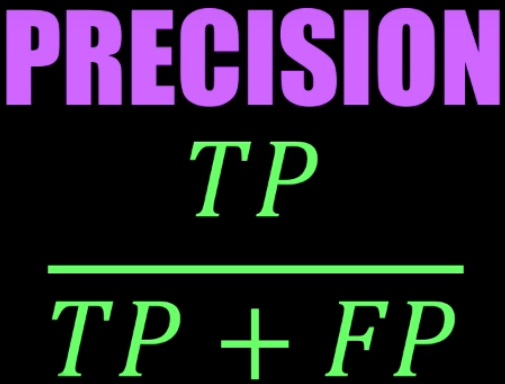

##### Recall 

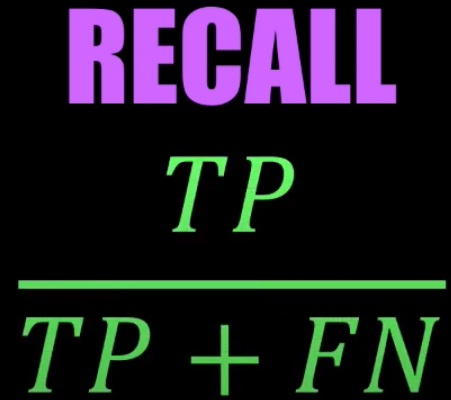

##### donde: 

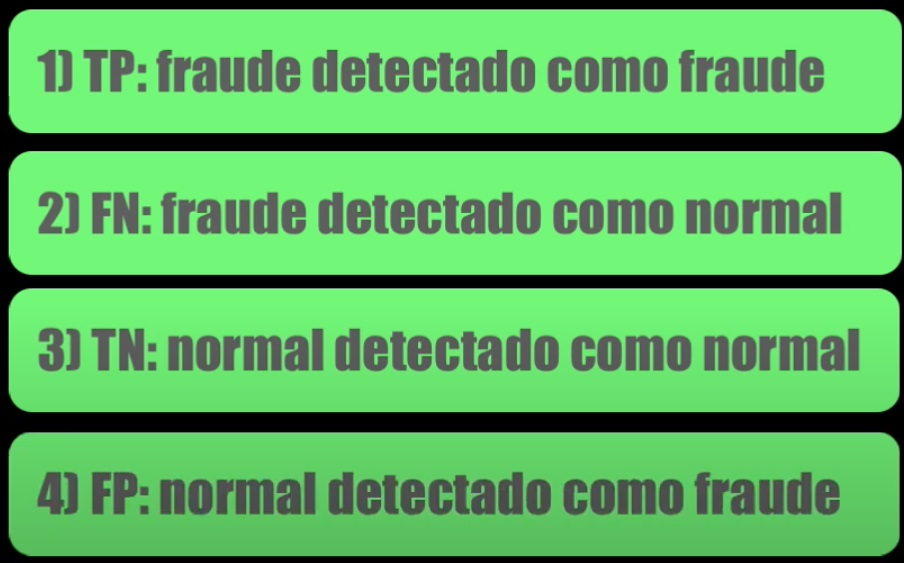

In [40]:
# se define el umbral 
from sklearn.metrics import confusion_matrix, precision_recall_curve
# Se observa graficamente en la grafica de Precision/Recall vs Umbral que una es inversamente 
# proporcinal a la otra por lo que se debe definir cual es el escencario mas favorable para 
# cumplir el objetivo del ejercicio. Para este caso la preferencia es obtener el mejor recall 
# posible de manera que los casos de fraude se puedan detectar efectivamente. 

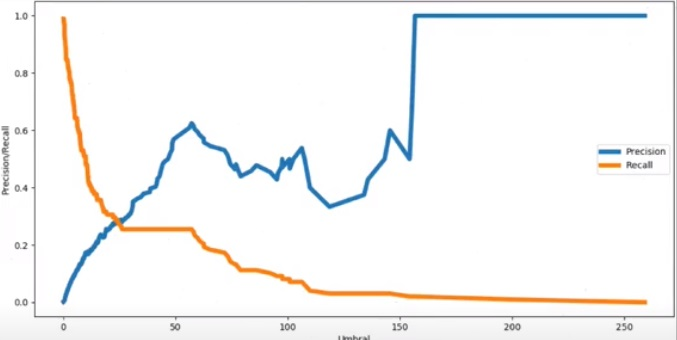

In [44]:
# para esto, se selecciona el umbral en 0.75 donde se observa que el valor del recall es lo mas 
# alto posible
umbral_fijo = 0.75
Y_pred = [1 if e > umbral_fijo else 0 for e in ecm]

In [ ]:
# utilizando la matriz de confusion se podria obtener los, teniendo en cuenta que se habia 
# definido un umbral que favorezca el recall, se observa que la precision es de apenas un 0.01, 
# lo cual indica que hay muchos falsos positivos, mientras que el recall es de 0.92 lo cual 
# indica que el 92 de las transacciones fraudulentas fueron detectadas correctamente. 
conf_matrix = confusion_matrix(Y_test, Y_pred)

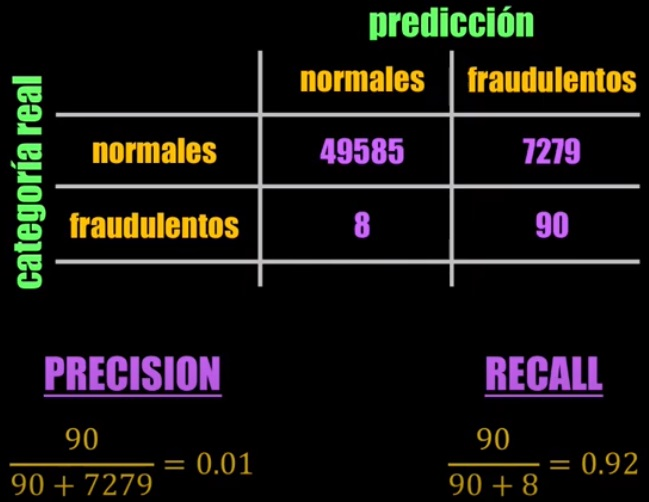